In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import cm
from astropy.io import fits
from astropy.table import Table

In [2]:
f = fits.open("mastar-catalogue.fits.gz")

In [3]:
# Header del primer HDU, donde estan los espectros

f[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6351                                                  
NAXIS2  =                21847                                                  
EXTEND  =                    T                                                  
CRVAL1  =               3650.0                                                  
CDELT1  =                  1.0                                                  
CRPIX1  =                    1                                                  
CTYPE1  = 'wavelength'                                                          
CUNIT1  = 'AA      '                                                            
EXTNAME = 'SPECTRA '           / extension name                                 

In [4]:
# El primer numero es el numero de espectros y el segundo es el numero de longitudes de onda, cada fila es el flujo normalizado

f[0].data.shape

(21847, 6351)

In [5]:
# Header de la tabla de parametros, los cards que se llaman type son el nombre de cada columna. estan las unidades, el tipo de dato, etc.

f[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  119 / length of dimension 1                          
NAXIS2  =                21847 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   21 / number of table fields                         
TTYPE1  = 'ID      '                                                            
TFORM1  = '22A     '                                                            
TTYPE2  = 'RECORD  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'NEXP    '        

In [6]:
# Informacion del primer objeto

f[1].data

FITS_rec([('13-0', 27373., 6., '15h24m04.27s', '+41d54m50.04s', 2.2696002, 0.01342119, 7.86495821e-06, 133.2799 , 3.22866259e-15, 16.28, 15.38 , 15.05 , 14.94 , 14.9 ,  -60.050854, 0.8497747 , nan, nan, nan, nan),
          ('13-1', 27376., 6., '15h23m54.70s', '+41d30m57.16s', 2.4536493, 0.01397268, 4.95945596e-06, 100.02849, 1.98049199e-15, 16.86, 15.93 , 15.65 , 15.53 , 15.47,  -65.59255 , 1.0004026 , nan, nan, nan, nan),
          ('13-11', 27405., 6., '15h29m17.82s', '+43d37m48.81s', 3.3467603, 0.02216246, 4.26427005e-06,  64.73307, 8.31222654e-16, 17.85, 16.88 , 16.57 , 16.47 , 16.46, -185.34999 , 0.853247  , nan, nan, nan, nan),
          ...,
          ('7-986892', 39965., 2., '06h58m20.42s', '-00d56m41.69s', 5.0011015, 0.4684203 , 2.12059822e-05, 130.86694, 1.36249095e-14,   nan, 15.036, 14.899, 15.016,   nan,   65.24711 , 0.90841526, nan, nan, nan, nan),
          ('7-9898583', 47161., 3., '13h34m06.25s', '+72d21m25.99s', 1.8127918, 0.01225583, 9.92800196e-05, 230.6784 , 2.431

In [7]:
# Visualizacion del DataFrame

Table(f[1].data).to_pandas()

ID   RECORD  NEXP            RA            DEC      DIST  \
0           13-0  27373.0   6.0  15h24m04.27s  +41d54m50.04s  2.269600   
1           13-1  27376.0   6.0  15h23m54.70s  +41d30m57.16s  2.453649   
2          13-11  27405.0   6.0  15h29m17.82s  +43d37m48.81s  3.346760   
3           13-2  27379.0   6.0  15h22m34.17s  +42d26m50.59s  2.183074   
4           13-3  27381.0   6.0  15h30m54.20s  +42d38m28.17s  1.741974   
...          ...      ...   ...           ...            ...       ...   
21842  7-9860659  47164.0   4.0  13h21m41.92s  +71d49m32.46s  0.321949   
21843  7-9862368  41636.0   2.0  13h23m04.54s  +72d23m28.82s  9.436006   
21844   7-986892  39965.0   2.0  06h58m20.42s  -00d56m41.69s  5.001101   
21845  7-9898583  47161.0   3.0  13h34m06.25s  +72d21m25.99s  1.812792   
21846  7-9993863   1473.0   6.0  01h36m50.31s  +29d39m30.55s  0.744885   

            EBV         VCORR         SNR         FNORM  ...      GSDSS  \
0      0.013421  7.864958e-06  133.279907  3.228663e-15  ...  15.380000   
1      0.013973  4.959456e-06  100.028488  1.980492e-15  ...  15.930000   
2      0.022162  4.264270e-06   64.733070  8.312227e-16  ...  16.879999   
3      0.017754  5.116091e-07   33.779675  3.039823e-16  ...  17.959999   
4      0.017034  0.000000e+00   87.160332  1.685715e-15  ...  16.080000   
...         ...           ...         ...           ...  ...        ...   
21842  0.006083  3.265872e-04  200.809418  1.149349e-14  ...  14.347000   
21843  0.017865  6.165363e-07   88.453705  1.071468e-14  ...  14.358000   
21844  0.468420  2.120598e-05  130.866943  1.362491e-14  ...  15.036000   
21845  0.012256  9.928002e-05  230.678406  2.431998e-14  ...  13.806000   
21846  0.039385  1.090618e-05  419.303986  5.036625e-14  ...  12.498000   

           RSDSS      ISDSS      ZSDSS      RADVEL     RVERR  TEFF  LOGG  MET  \
0      15.050000  14.940000  14.900000  -60.050854  0.849775   NaN   NaN  NaN   
1      15.650000  15.530000  15.470000  -65.592552  1.000403   NaN   NaN  NaN   
2      16.570000  16.469999  16.459999 -185.349991  0.853247   NaN   NaN  NaN   
3      17.620001  17.510000  17.459999  -16.344204  1.108576   NaN   NaN  NaN   
4      15.800000  15.710000  15.680000 -210.901459  1.631504   NaN   NaN  NaN   
...          ...        ...        ...         ...       ...   ...   ...  ...   
21842  13.492000  13.207000        NaN  -10.450968  0.656489   NaN   NaN  NaN   
21843  13.584000  13.279000        NaN    8.299033  0.294889   NaN   NaN  NaN   
21844  14.899000  15.016000        NaN   65.247108  0.908415   NaN   NaN  NaN   
21845  12.579000  12.285000        NaN  -39.502739  0.755564   NaN   NaN  NaN   
21846  12.268000  12.193000        NaN    6.239412  0.816244   NaN   NaN  NaN   

       ALPHAM  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
21842     NaN  
21843     NaN  
21844     NaN  
21845     NaN  
21846     NaN  

[21847 rows x 21 columns]

In [8]:
# Columnas del DataFrame

Table(f[1].data).to_pandas().columns

Index(['ID', 'RECORD', 'NEXP', 'RA', 'DEC', 'DIST', 'EBV', 'VCORR', 'SNR',
       'FNORM', 'USDSS', 'GSDSS', 'RSDSS', 'ISDSS', 'ZSDSS', 'RADVEL', 'RVERR',
       'TEFF', 'LOGG', 'MET', 'ALPHAM'],
      dtype='object')

In [9]:
# Las ultimas 4 columnas estan llenas de NaN. Mi tarea sera llenar esos datos

T_e  = Table(f[1].data).to_pandas().TEFF
Met  = Table(f[1].data).to_pandas().MET

T_e, Met

(0       NaN
 1       NaN
 2       NaN
 3       NaN
 4       NaN
          ..
 21842   NaN
 21843   NaN
 21844   NaN
 21845   NaN
 21846   NaN
 Name: TEFF, Length: 21847, dtype: float32,
 0       NaN
 1       NaN
 2       NaN
 3       NaN
 4       NaN
          ..
 21842   NaN
 21843   NaN
 21844   NaN
 21845   NaN
 21846   NaN
 Name: MET, Length: 21847, dtype: float32)

In [10]:
# Para construir el arreglo de lambdas

wl = np.array([(i) * f[0].header["CDELT1"] + f[0].header["CRVAL1"] for i in range(f[0].header["NAXIS1"])])

In [11]:
f.info()

Filename: mastar-catalogue.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SPECTRA       1 PrimaryHDU      12   (6351, 21847)   float64   
  1  CATALOGUE     1 BinTableHDU     67   21847R x 21C   ['22A', 'E', 'E', '12A', '13A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   


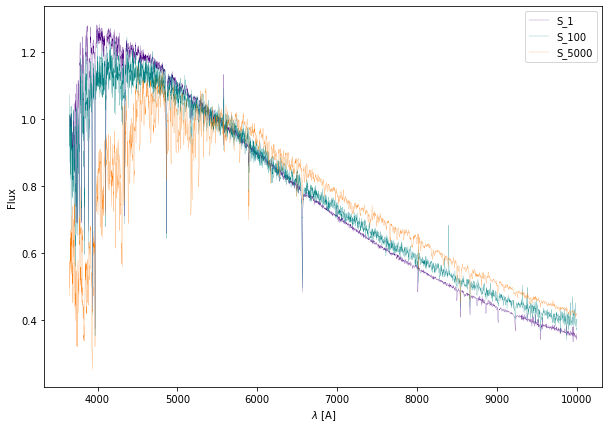

In [12]:
#Visualizacion de espectros

plt.subplots(figsize=(10,7))
plt.plot(wl, f[0].data[0], color='indigo',lw=.2, label='S_1')
plt.plot(wl, f[0].data[100], color='teal',lw=.2, label='S_100')
plt.plot(wl, f[0].data[5000], color='tab:orange',lw=.2, label='S_5000')
#plt.title('Mi primer plot de estrellitas')
plt.xlabel(r'$\lambda$ [A]')
plt.ylabel(r'Flux')
plt.legend(loc=1)
#plt.savefig('plot_01.png')

In [14]:
import joblib

cosha = joblib.load("estimator-mor-v3.1.1-cleaned-v2-gsl.pk")
cosha

{'mode': MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=4,
                                                          min_samples_split=5,
                                                          random_state=0,
                                                          verbose=1),
                      n_jobs=-1),
 'P16': MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.16,
                                                          loss='quantile',
                                                          max_depth=4,
                                                          min_samples_split=5,
                                                          random_state=0,
                                                          verbose=1),
                      n_jobs=-1),
 'P50': MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.5,
                                                          loss='quantile',
                                 

In [14]:
# calcular p16 y p84
# calcular std = p84-p16
# plt.pcolormesh(teff. logg, std)

mode_predict = cosha["mode"].predict(f[0].data)
p16_predict  = cosha["P16"].predict(f[0].data)
p50_predict  = cosha["P50"].predict(f[0].data)
p84_predict  = cosha["P84"].predict(f[0].data)


In [15]:
mode_predict, p16_predict, p50_predict, p84_predict

NameError: name 'mode_predict' is not defined

In [16]:
# Crear Tabla 

T_cosha = pd.DataFrame({'mode_Teff' :mode_predict[:,0],
                      'mode_logG' :mode_predict[:,1],
                      'mode_Fe'   :mode_predict[:,2],
                      'mode_alpha':mode_predict[:,3],
                      'p16_Teff'  :p16_predict[:,0],
                      'p16_logG'  :p16_predict[:,1],
                      'p16_Fe'    :p16_predict[:,2],
                      'p16_alpha' :p16_predict[:,3],
                      'p50_Teff'  :p50_predict[:,0],
                      'p50_logG'  :p50_predict[:,1],
                      'p50_Fe'    :p50_predict[:,2],
                      'p50_alpha' :p50_predict[:,3],
                      'p84_Teff'  :p84_predict[:,0],
                      'p84_logG'  :p84_predict[:,1],
                      'p84_Fe'    :p84_predict[:,2],
                      'p84_alpha' :p84_predict[:,3],                      
                      })

#T_cosha.to_csv('T_cosha.csv',index=False)
T_cosha

NameError: name 'mode_predict' is not defined

In [17]:
# calcular std = p84-p16

std = (p84_predict - p16_predict)/2 
std[:,0] = std[:,0] * mode_predict[:,0] * np.log(10)
std, len(std)

NameError: name 'p84_predict' is not defined

In [18]:
# Teff, primer columna [0], logG segunda columna [1]

T_eff = mode_predict[:,0]  #len = 21847
log_G = mode_predict[:,1]  #len = 21847

Fe    = mode_predict[:,2]  #len = 21847
alpha = mode_predict[:,3]  #len = 21847

C = std[:,0]               #len = 21847

T_eff, log_G, Fe, alpha, C

(array([3.7944328 , 3.7944478 , 3.80203878, ..., 4.0480371 , 3.65289212,
        3.81322063]),
 array([3.78895645, 3.93176632, 4.35600775, ..., 3.80645224, 2.47463449,
        4.12401501]),
 array([-1.86355586, -1.37228565, -1.12707138, ..., -0.83567928,
         0.17777911, -0.40232469]),
 array([0.23076625, 0.41583995, 0.24484467, ..., 0.01846146, 0.08186578,
        0.06142521]),
 array([0.05486626, 0.02208425, 0.02638302, ..., 0.67932313, 0.06755694,
        0.21430154]))

In [18]:
# PLOT
# #plt.pcolormesh(T_eff, log_G, C, shading='nearest')

x = 10**T_eff
y = log_G
z = C

plt.subplots(figsize=(10,7))
#norm = mpl.colors.Normalize(np.min(std), np.max(std))
#plt.scatter(x,y,c=z,norm=norm,cmap='rainbow')
plt.scatter(x,y,c=z,cmap='coolwarm',alpha=0.8)  #coolwarm


plt.xlabel(r'$T_{eff}$ [K]')
plt.ylabel(r'$logG$')
#plt.savefig('plot_02.png')

NameError: name 'T_eff' is not defined